In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd

Histogram

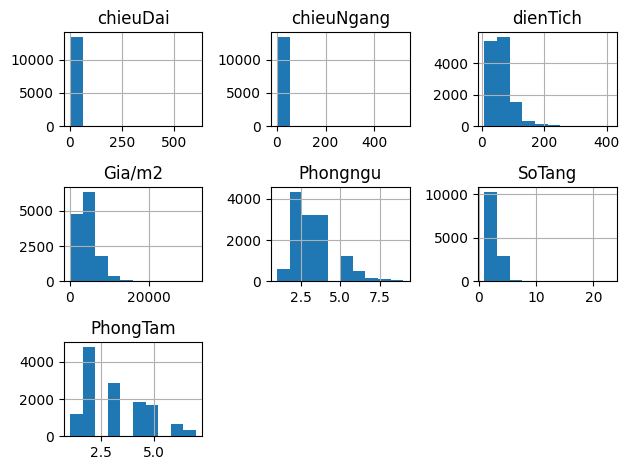

In [2]:
data= read_csv("dataAfterCleaning.csv")
data.hist()
plt.tight_layout() 
plt.show()

Density Plot

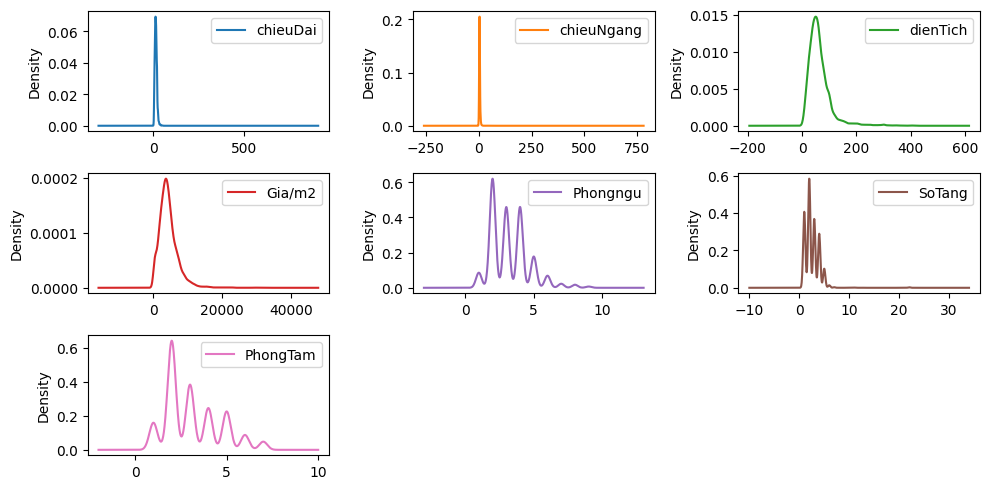

In [3]:
data.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, figsize=(10, 5))
plt.tight_layout()
plt.show()

Box Plot

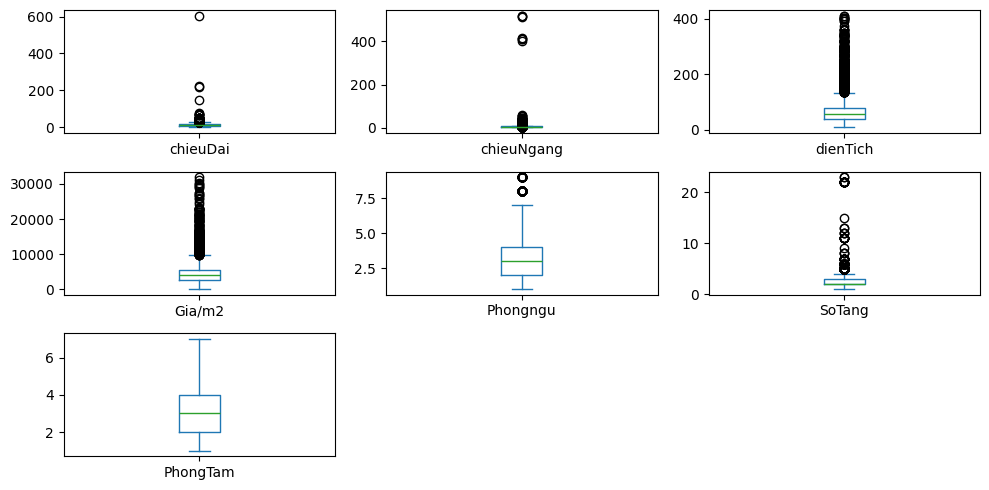

In [4]:
data.plot(kind='box', subplots=True, layout=(3, 3), sharex=False, figsize=(10, 5))
plt.tight_layout()
plt.show()

Correlation Matrix Plot

In [10]:
sn.heatmap(data.corr(), annot=True)
plt.show()

ValueError: could not convert string to float: 'nhà ngõ, hẻm'

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10756\4261584616.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = temp.groupby([col, 'range'])['Gia/m2'].mean().unstack(fill_value=0)


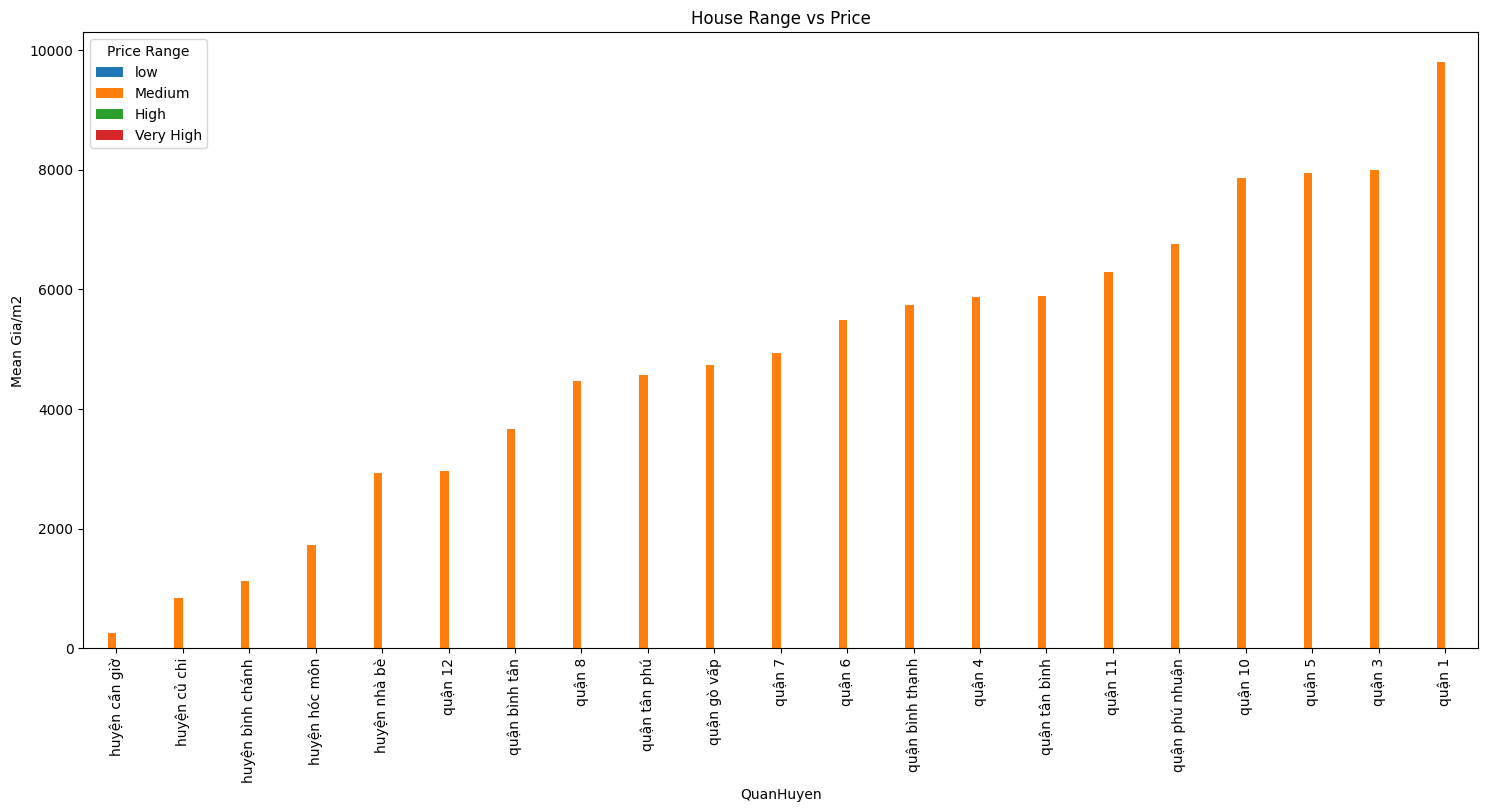

In [9]:
df = pd.DataFrame(data)

# Bins và nhãn cho phân loại giá
bins = [0, 42, 67917, 106250, 40833333]
labels = ['low', 'Medium', 'High', 'Very High']

def Analyst(col):
    # Tính giá trị trung bình của Gia/m2 theo từng quận/huyện
    table = df.groupby(col)['Gia/m2'].mean().reset_index()
    
    # Gộp lại với DataFrame gốc
    temp = df.merge(table, how='left', on=col, suffixes=('', '_mean'))
    
    # Phân loại theo bins
    temp['range'] = pd.cut(temp['Gia/m2_mean'], bins=bins, right=False, labels=labels)
    
    # Tạo DataFrame mới để vẽ biểu đồ
    df_plot = temp.groupby([col, 'range'])['Gia/m2'].mean().unstack(fill_value=0)
    
    # Sắp xếp theo giá trị trung bình Gia/m2
    df_plot_sorted = df_plot.mean(axis=1).sort_values().index
    df_plot = df_plot.reindex(df_plot_sorted)

    # Vẽ biểu đồ
    plt.rcParams['figure.figsize'] = (18, 8)
    df_plot.plot.bar()
    plt.title('House Range vs Price')
    plt.xlabel(col)
    plt.ylabel('Mean Gia/m2')
    plt.legend(title='Price Range')
    plt.show()

# Gọi hàm để phân tích
Analyst('QuanHuyen')